## 학습목표
 1. 정규표현식(re) 에 대한 이해 및 숙지

* 정규표현식 
    - 특정한 규칙을 가진 문자열 집합을 표현하는데 사용하는 언어 
    - regular expression이라고 영어로 표시 
    - 특정한 패턴과 일치하는 문자열를 '검색', '치환', '제거' 하는 기능을 지원
    - 정규식의 사용 예
        - 웹 페이지에서 숫자로 된 값들만 추출 
        - 찾고 싶은 문자열이 소괄호안에 존재할 때 소괄호 안의 문자들만 추출 
        - 대상 문자열 패턴을 특정 문자로 치환 

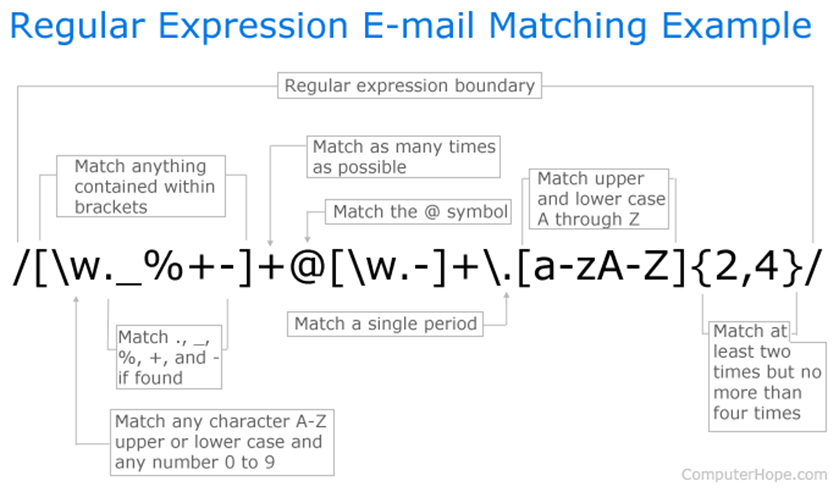

* 파이썬에서 **raw string**
    - 문자열 앞에 r이 붙으면 해당 문자열이 구성된 그대로 문자열로 변환

### 정규식을 연습할 사이트 
- https://regex101.com

#### **기본 패턴**
 - a, X, 9 등등 문자 하나하나의 character들은 정확히 해당 문자와 일치
   - e.g) 패턴 test는 test 문자열과 일치
   - 대소문자의 경우 기본적으로 구별하나, 구별하지 않도록 설정 가능
 - 몇몇 문자들에 대해서는 예외가 존재하는데, 이들은 틀별한 의미로 사용 됨
   - . ^ $ * + ? { } [ ] \ | ( )
 
 - . (마침표) - 어떤 한개의 character와 일치 (newline(엔터) 제외)
 
 - \w - 문자 character와 일치 [a-zA-Z0-9_]
 - \s - 공백문자와 일치
 - \t, \n, \r - tab, newline, return
 - \d - 숫자 character와 일치 [0-9]
 - ^ = 시작, $ = 끝 각각 문자열의 시작과 끝을 의미
 - \가 붙으면 스페셜한 의미가 없어짐. 예를들어 \\.는 .자체를 의미 \\\는 \를 의미
 - 자세한 내용은 링크 참조 https://docs.python.org/3/library/re.html

## 메타 문자 

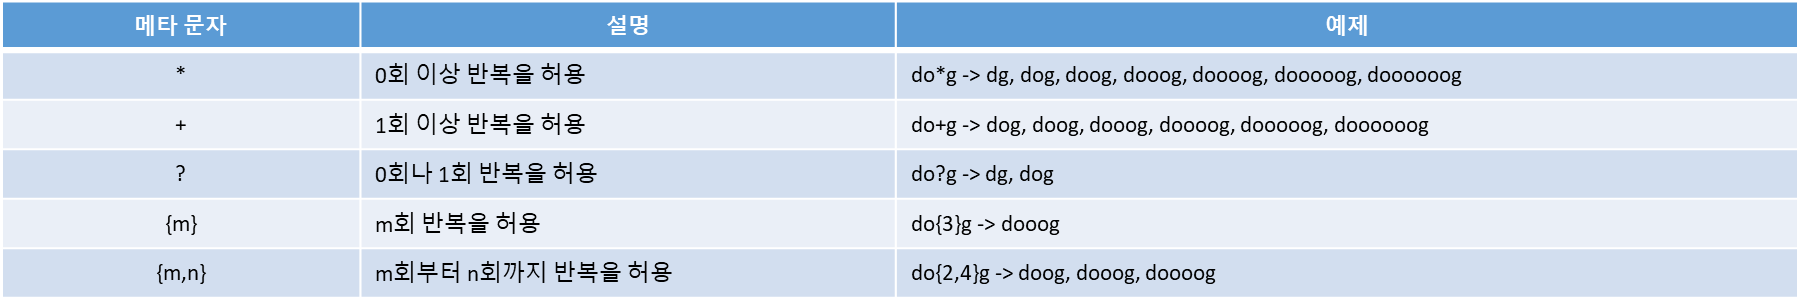

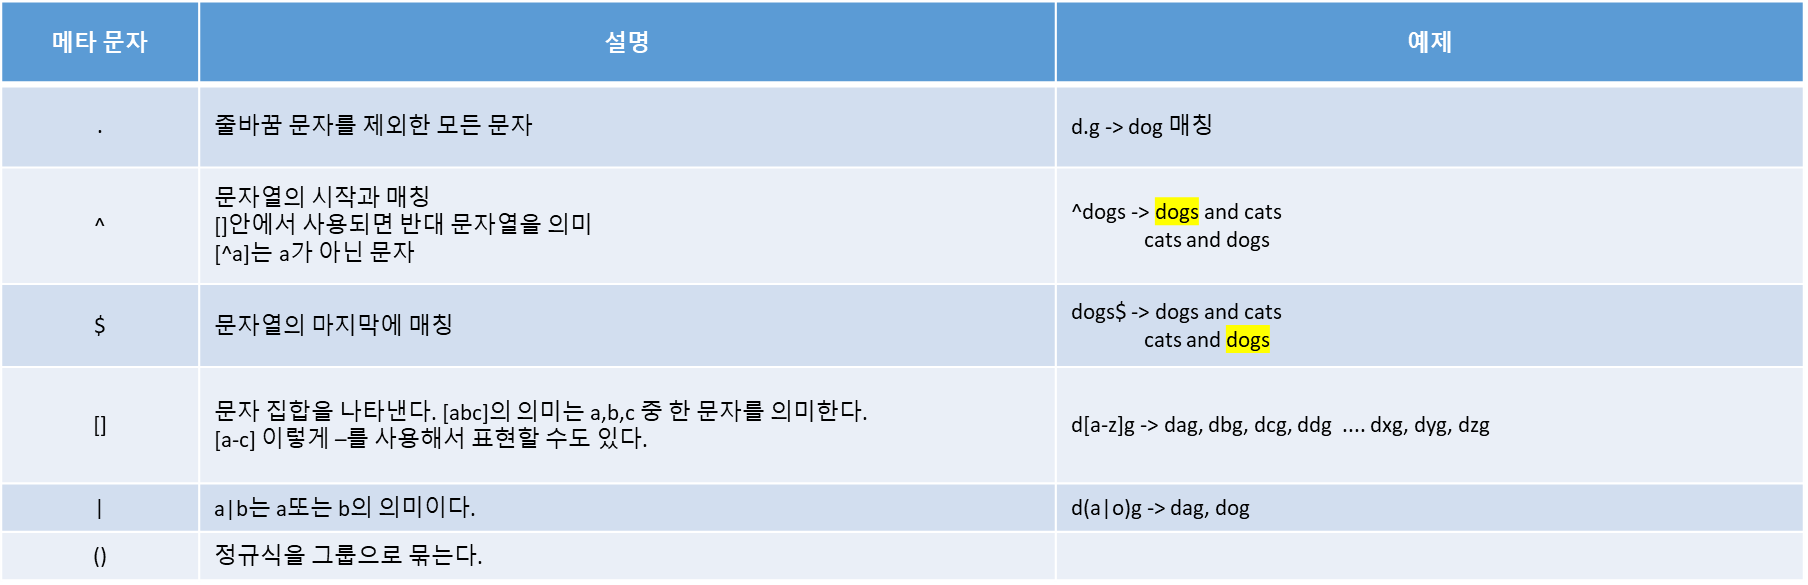

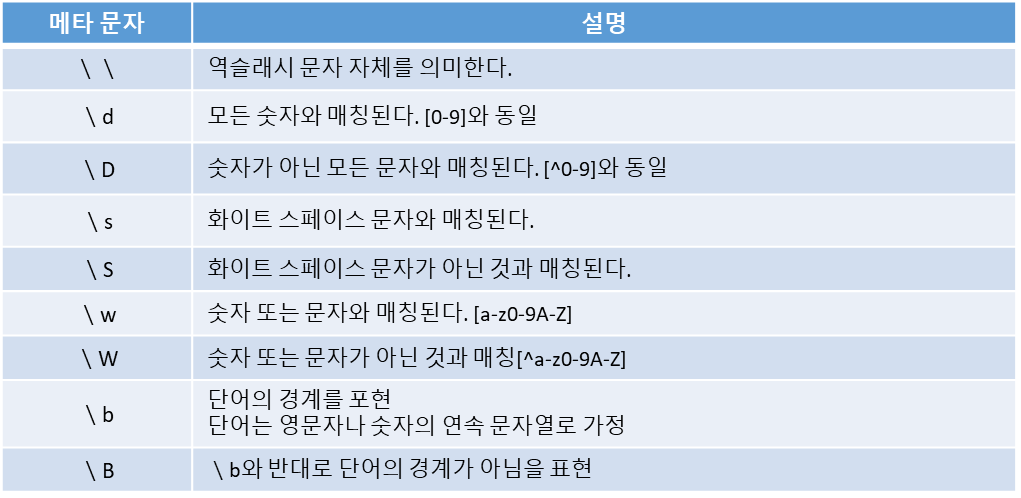

#### **search method**
 - 첫번째로 패턴을 찾으면 match 객체를 반환
 - 패턴을 찾지 못하면 None 반환

#### **metacharacters (메타 캐릭터)**

#### **[]** 문자들의 범위를 나타내기 위해 사용
   - [] 내부의 메타 캐릭터는 캐릭터 자체를 나타냄
   - e.g)
   - [abck] : a or b or c or k
   - [abc.^] : a or b or c or . or ^
   - [a-d]  : -와 함께 사용되면 해당 문자 사이의 범위에 속하는 문자 중 하나
   - [0-9]  : 모든 숫자
   - [a-z]  : 모든 소문자
   - [A-Z]  : 모든 대문자
   - [a-zA-Z0-9] : 모든 알파벳 문자 및 숫자
   - [^0-9] : ^가 맨 앞에 사용 되는 경우 해당 문자 패턴이 아닌 것과 매칭

#### **반복패턴**
 - 패턴 뒤에 위치하는 *, +, ?는 해당 패턴이 반복적으로 존재하는지 검사 
   - '+' -> 1번 이상의 패턴이 발생
   - '*' -> 0번 이상의 패턴이 발생
   - '?' -> 0 혹은 1번의 패턴이 발생
 - 반복을 패턴의 경우 greedy하게 검색 함, 즉 가능한 많은 부분이 매칭되도록 함
  - e.g) a[bcd]*b  패턴을 abcbdccb에서 검색하는 경우
    - ab, abcb, abcbdccb 전부 가능 하지만 최대한 많은 부분이 매칭된 abcbdccb가 검색된 패턴

#### **미니멈 매칭(non-greedy way)**
 - 기본적으로 *, +, ?를 사용하면 greedy(맥시멈 매칭)하게 동작함
 - *?, +?을 이용하여 해당 기능을 구현

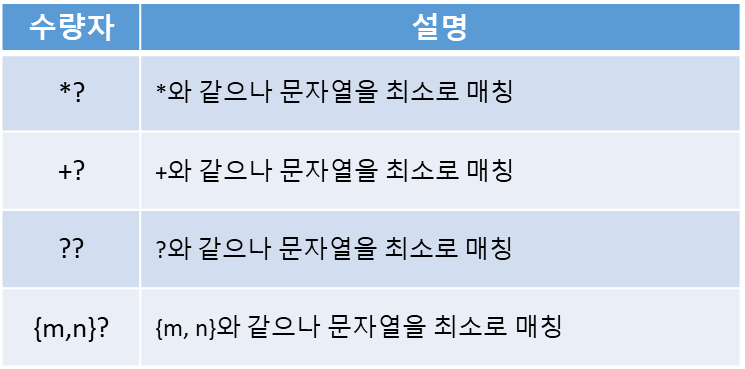

In [14]:
"c:\aa"

'c:\x07a'

In [15]:
r"c:\aa"

'c:\\aa'

In [16]:
"C:\Windows\System32\drivers\etc"

'C:\\Windows\\System32\\drivers\\etc'

In [17]:
import re

In [18]:
text = """<a href="index.html">HERE</a><font size="10">"""

In [19]:
text[3:44]

'href="index.html">HERE</a><font size="10"'

In [20]:
re.search(r'href="(.*)"', text).group()

'href="index.html">HERE</a><font size="10"'

In [21]:
re.search(r'href="(.*?)"', text).group()

'href="index.html"'

 #### **grouping**
  - ()을 사용하여 그루핑
  - 매칭 결과를 각 그룹별로 분리 가능
  - 패턴 명시 할 때, 각 그룹을 괄호() 안에 넣어 분리하여 사용

 #### **{}**
  - *, +, ?을 사용하여 반복적인 패턴을 찾는 것이 가능하나, 반복의 횟수 제한은 불가
  - 패턴뒤에 위치하는 중괄호{}에 숫자를 명시하면 해당 숫자 만큼의 반복인 경우에만 매칭
  - {4} - 4번 반복
  - {3,4} - 3 ~ 4번 반복

#### **{}?**
 - {m,n}의 경우 m번 에서 n번 반복하나 greedy하게 동작
 - {m,n}?로 사용하면 non-greedy하게 동작. 즉, 최소 m번만 매칭하면 만족

#### **match**
 - search와 유사하나, 주어진 문자열의 시작부터 비교하여 패턴이 있는지 확인
 - 시작부터 해당 패턴이 존재하지 않다면 None 반환

#### **findall**
 - search가 최초로 매칭되는 패턴만 반환한다면, findall은 매칭되는 전체의 패턴을 반환
 - 매칭되는 모든 결과를 리스트 형태로 반환

#### **sub**
 - 주어진 문자열에서 일치하는 모든 패턴을 replace
 - 그 결과를 문자열로 다시 반환함
 - 두번째 인자는 특정 문자열이 될 수도 있고, 함수가 될 수 도 있음
 - count가 0인 경우는 전체를, 1이상이면 해당 숫자만큼 치환 됨

#### **compile**
 - 동일한 정규표현식을 매번 다시 쓰기 번거로움을 해결
 - compile로 해당표현식을 re.RegexObject 객체로 저장하여 사용가능

### 함수의 인수

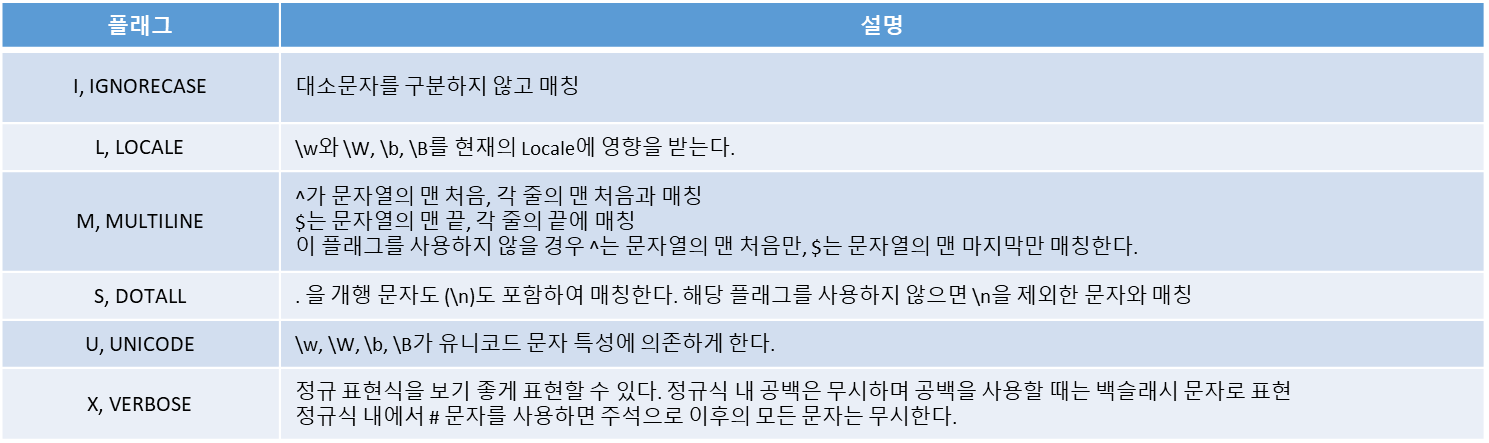

## 연습문제

In [22]:
text_famous = """201901 Dost thou love life? Then do not squander time, for that is the stuff life is made of. (Benjamin Franklin) 그대는 인생을 사랑하는가? 그렇다면 시간을 낭비하지 말라, 시간이야말로 인생을 형성하는 재료이기 때문이다. (벤자민 프랭클린)  
201902 Life is like riding a bicycle. To keep your balance you must keep moving. (Albert Einstein) 인생은 자전거를 타는 것과 같다. 균형을 잡으려면 움직여야 한다. (알버트 아인슈타인) 
201903 Life is a tragedy when seen in close-up, but a comedy in long-shot. (Charlie Chaplin)  인생은 가까이서 보면 비극이지만 멀리서 보면 희극이다 (찰리 채플린) 
201904 Dream as if you'll live forever. Live as if you'll die today. (James Dean) 영원히 살 것처럼 꿈꾸고 오늘 죽을 것처럼 살아라. (제임스 딘) 
201905 Life is an endless series of trainwrecks with only brief commercial like breaks of happiness. (Deadpool) 인생이란 괴로움의 연속이고, 행복은 광고처럼 짧다. (데드풀)"""

In [23]:
re.search("Life.*", text_famous).group()

'Life is like riding a bicycle. To keep your balance you must keep moving. (Albert Einstein) 인생은 자전거를 타는 것과 같다. 균형을 잡으려면 움직여야 한다. (알버트 아인슈타인) '

In [24]:
p = re.compile("Life.*")

In [25]:
p.findall(text_famous)

['Life is like riding a bicycle. To keep your balance you must keep moving. (Albert Einstein) 인생은 자전거를 타는 것과 같다. 균형을 잡으려면 움직여야 한다. (알버트 아인슈타인) ',
 'Life is a tragedy when seen in close-up, but a comedy in long-shot. (Charlie Chaplin)  인생은 가까이서 보면 비극이지만 멀리서 보면 희극이다 (찰리 채플린) ',
 'Life is an endless series of trainwrecks with only brief commercial like breaks of happiness. (Deadpool) 인생이란 괴로움의 연속이고, 행복은 광고처럼 짧다. (데드풀)']

In [26]:
p2 = re.compile("[a-zA-Z].+[a-zA-Z][.]")

In [27]:
p2.findall(text_famous)

['Dost thou love life? Then do not squander time, for that is the stuff life is made of.',
 'Life is like riding a bicycle. To keep your balance you must keep moving.',
 'Life is a tragedy when seen in close-up, but a comedy in long-shot.',
 "Dream as if you'll live forever. Live as if you'll die today.",
 'Life is an endless series of trainwrecks with only brief commercial like breaks of happiness.']

In [28]:
p3 = re.compile("[가-힣].+[가-힣][.]")

In [29]:
p3.findall(text_famous)

['그대는 인생을 사랑하는가? 그렇다면 시간을 낭비하지 말라, 시간이야말로 인생을 형성하는 재료이기 때문이다.',
 '인생은 자전거를 타는 것과 같다. 균형을 잡으려면 움직여야 한다.',
 '영원히 살 것처럼 꿈꾸고 오늘 죽을 것처럼 살아라.',
 '인생이란 괴로움의 연속이고, 행복은 광고처럼 짧다.']

(?<=\()[a-zA-Z\s^)]*(?=\))

In [30]:
p3 = re.compile("(?<=\()[a-zA-Z\s^)]*(?=\))")

In [31]:
p3.findall(text_famous)

['Benjamin Franklin',
 'Albert Einstein',
 'Charlie Chaplin',
 'James Dean',
 'Deadpool']

In [32]:
import requests
from bs4 import BeautifulSoup

In [33]:
head = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'}

In [34]:
r = requests.get("https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2=230&sid1=105&date=20220425&page=1", headers = head)

In [57]:
text = "https://n.news.naver.com/mnews/article/015/0004690079?sid=105"

In [58]:
p = "([0-9]+)＼?sid"

In [59]:
pattern = re.compile(p)

In [56]:
pattern.findall(text)

[]

In [39]:
bs = BeautifulSoup(r.text, 'lxml')

In [42]:
tmp = bs.findAll("a")

In [43]:
tmp

[<a href="#lnb" tabindex="1"><span>메인 메뉴로 바로가기</span></a>,
 <a href="#main_content" tabindex="2"><span>본문으로 바로가기</span></a>,
 <a class="tool_button _search_content_toggle_btn nclicks(gnb.sch)" href="javascript:;"><span class="icon_search">검색</span></a>,
 <a class="h_logo nclicks(gnb.naver)" href="https://www.naver.com/"><span class="blind">NAVER</span></a>,
 <a class="h_news nclicks(gnb.news)" href="/"><span class="blind">뉴스</span></a>,
 <a class="entertain nclicks(gnb.enter)" href="https://entertain.naver.com/home">TV연예</a>,
 <a class="sports nclicks(gnb.sports)" href="https://sports.news.naver.com">스포츠</a>,
 <a class="weather nclicks(gnb.weather)" href="https://weather.naver.com">날씨</a>,
 <a class="premium nclicks(gnb.premium)" href="https://contents.premium.naver.com">프리미엄</a>,
 <a class="nclicks(lnb.pcmedia)" href="/"><span class="tx">언론사별</span> </a>,
 <a class="nclicks(lnb.pol)" href="/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=100"><span class="tx">정치</span> </a>,
 <a class="

In [ ]:
re.search("Life.*", text_famous).group()